In [17]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import matplotlib.pyplot as plt
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [18]:
from tqdm import tqdm
from scipy import constants 


Dx  =  10 # m
Dx  =  2.444732 # m SPS
betx=1

arc_tracking = xt.LineSegmentMap(
        
        qx=26.299364727042544, qy=26.249362950108466,
        dqx=0, dqy=0,
        betx=1,
        bety=1,
        
        dx=Dx,
        
        # qs=qs,
        # bets=bets,
        )


In [19]:
from ion_properties import ions,lead,calcium,xenon
ion=calcium

In [20]:
q0 = ion.q0
mass0 = ion.mass0

gamma = ion.gamma_rel
beta= ion.beta_rel
p0c = mass0*gamma*beta #eV/c

nemitt = 1.5e-6
emittance = nemitt/ion.gamma_rel

# compute initial beam parameters
x_init = np.sqrt(betx*emittance)
# y_init = np.sqrt(beta_y*emittance)

delta_init=1e-3

particles = xp.Particles(
        mass0=mass0,
        p0c=p0c,
        q0=q0,
        x=x_init,
        px=0,
        y=0,
        py=0,
        delta=delta_init,
        zeta=0)

num_particles=2
num_turns=int(10000)
# num_turns=int(100)



In [21]:
delta_update=np.array([0.2e-3,0.2e-3])

delta_update=np.array([0.2e-3])

x1=[]
px1=[]

x2=[]
px2=[]

x3=[]
px3=[]

# line=xt.Line(
#         elements=[arc_tracking])
# line.build_tracker()
cooling_threshold = 0.8e-4

# Perform the cooling process
for turn in tqdm(range(num_turns)):
    x1.append(particles.x.copy()*1e3)
    px1.append(particles.px.copy()*1e3)
    arc_tracking.track(particles)

particles0=particles.copy()

while particles.x > cooling_threshold:
    arc_tracking.track(particles)
print(particles.x)

particles.update_delta(delta_update)  # Reduce the momentum spread    
for turn in tqdm(range(num_turns)):
    x2.append(particles.x.copy()*1e3)
    px2.append(particles.px.copy()*1e3)
    arc_tracking.track(particles)

heating_threshold = 0.0048
while particles0.x < heating_threshold:
    arc_tracking.track(particles0)
print(particles0.x)

particles0.update_delta(delta_update)  # Reduce the momentum spread    
for turn in tqdm(range(num_turns)):
    x3.append(particles0.x.copy()*1e3)
    px3.append(particles0.px.copy()*1e3)
    arc_tracking.track(particles0)



    # Check if the threshold is reached for dispersive cooling
    #if particles.x <= cooling_threshold:
#     particles.update_delta(delta_update)  # Reduce the momentum spread
#     #particles.add_to_energy(-1e7)
# # After cooling, continue tracking the particles
# for turn in tqdm(range(num_turns)):
#     line.track(particles)  
   


# x2 = monitor2.x[:,:]
# px2 = monitor2.px[:,:]
# y2 = monitor2.y[:,:]
# py2 = monitor2.py[:,:]
# delta2 = monitor2.delta[:,:]
# zeta2 = monitor2.zeta[:,:]

100%|██████████| 10000/10000 [00:00<00:00, 14520.74it/s]


[7.97760324e-05]


100%|██████████| 10000/10000 [00:00<00:00, 13912.58it/s]


[0.00480183]


100%|██████████| 10000/10000 [00:00<00:00, 13496.50it/s]


In [22]:
min(x1)

array([0.07900182])

In [23]:
orbit1=Dx*delta_init*1e3
orbit2=Dx*delta_update*1e3

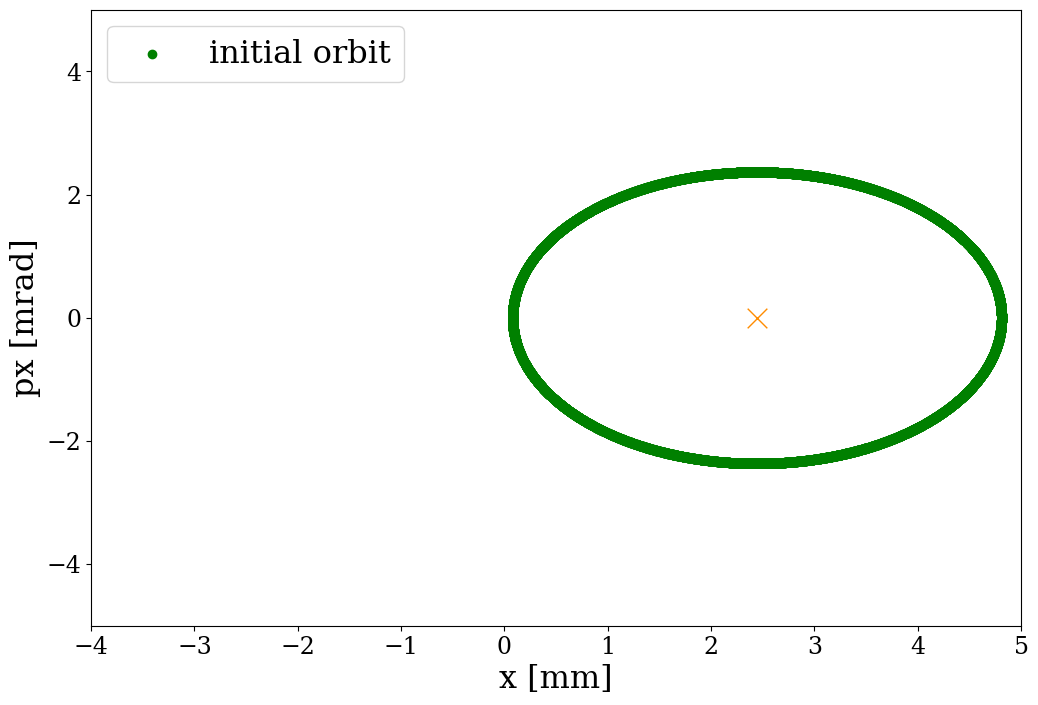

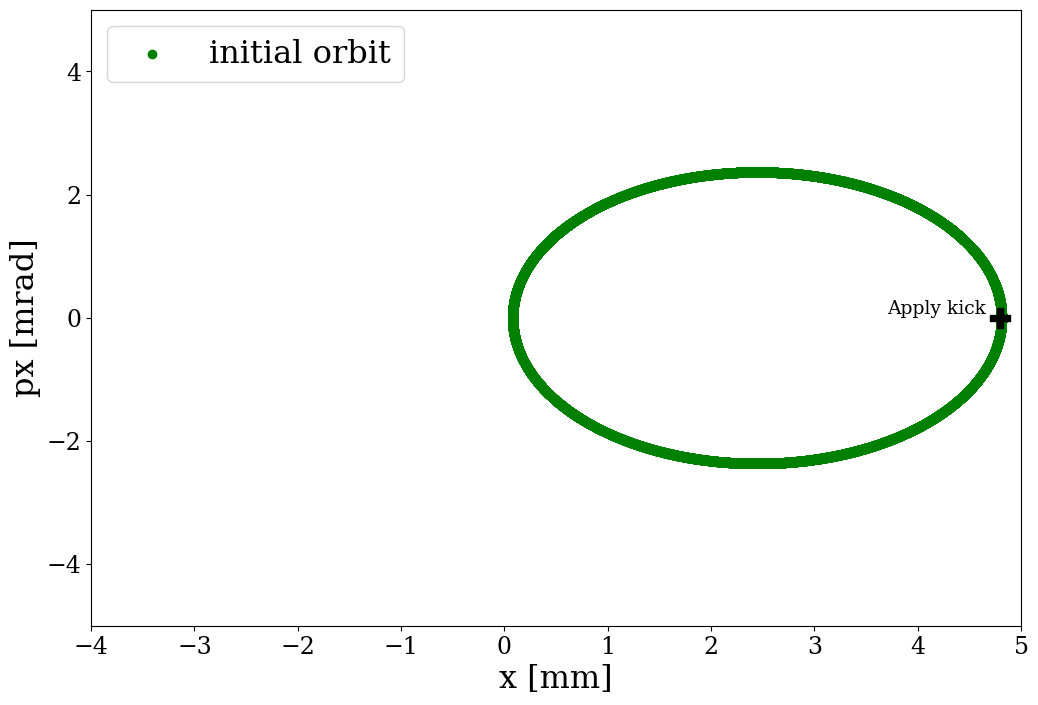

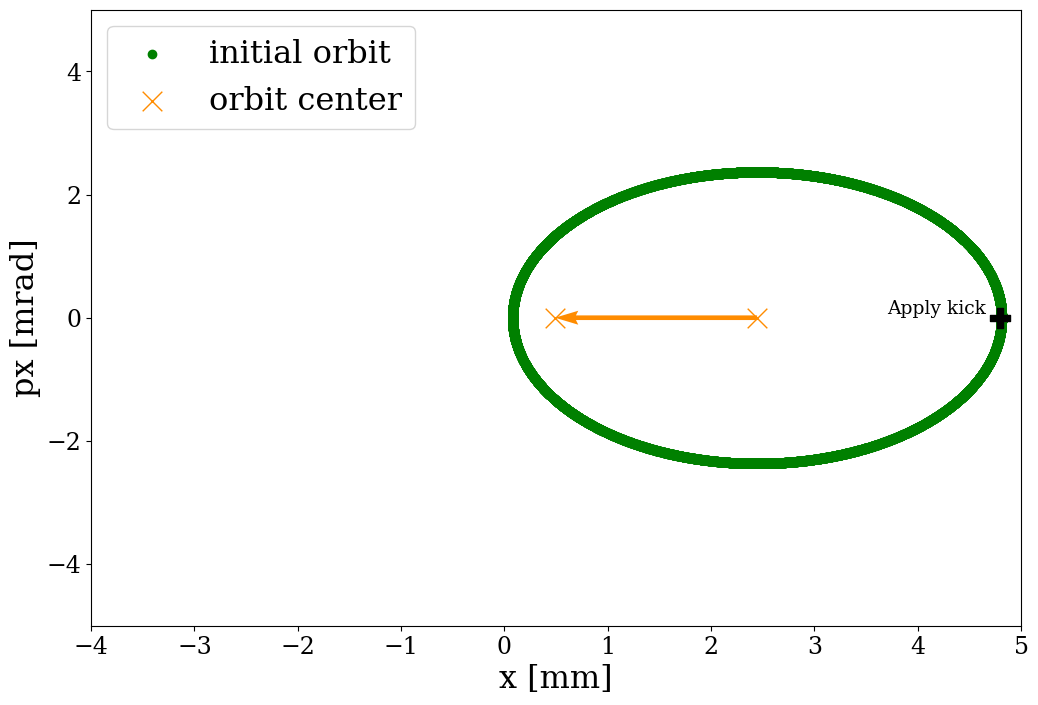

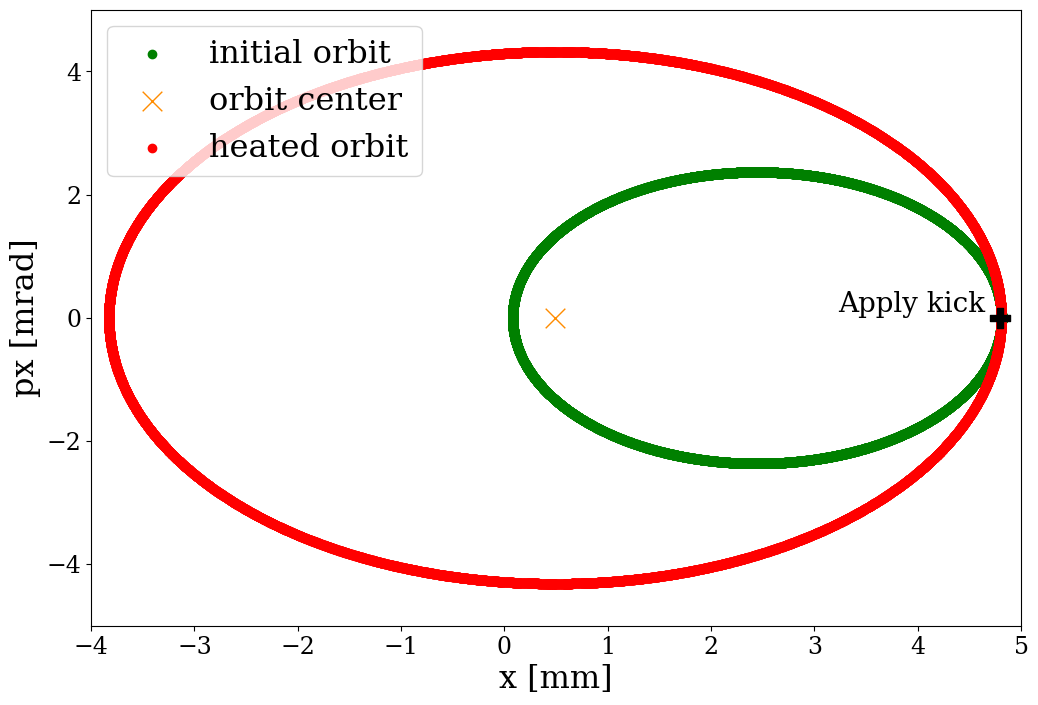

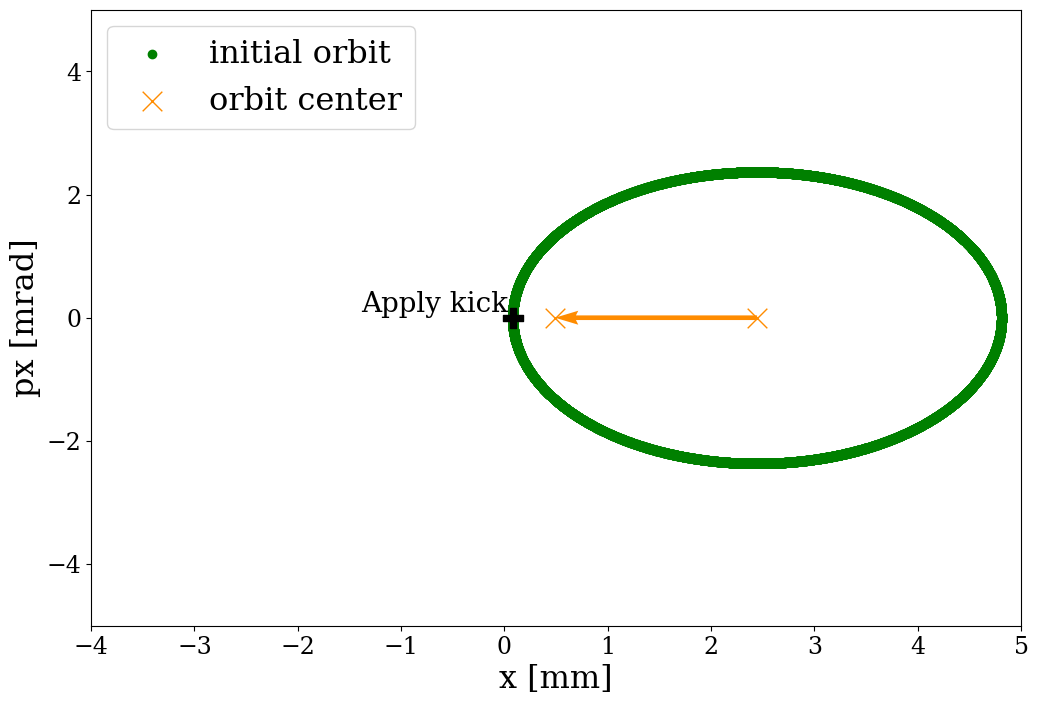

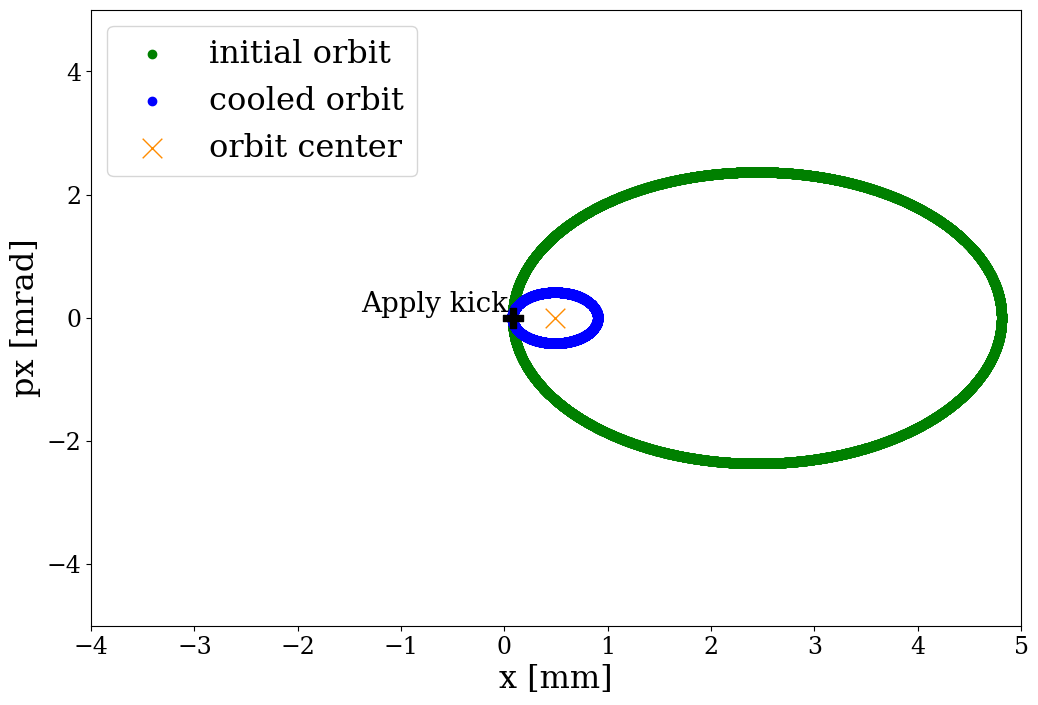

In [24]:
#intial plot

plt.figure(figsize=(12, 8))
plt.scatter(x1,px1,color='green',label='initial orbit')
# plt.scatter(x2,px2,color='blue',label='cooled orbit')
# plt.axvline(cooling_threshold,color='blue',label='cooling kick')
#plt.scatter(orbit1,0,color='orange',marker='x',linewidths=1)
plt.scatter(orbit1, 0, color='darkorange', marker='x', s=200, linewidths=1)
# plt.scatter(orbit2,0,color='orange',marker='x')
# plt.scatter(x3,px3,color='red',label='heated orbit')
# plt.axvline(heating_threshold,color='red',label='heating kick')
plt.ylabel('px [mrad]')
plt.xlabel('x [mm]')
plt.legend(loc='upper left')
plt.xlim([-4,5])
plt.ylim([-5,5])
plt.show()

#######################################################################################################################

plt.figure(figsize=(12, 8))
plt.scatter(x1,px1,color='green',label='initial orbit')
# plt.scatter(x2,px2,color='blue',label='cooled orbit')
# plt.axvline(cooling_threshold,color='blue',label='cooling kick')
#plt.scatter(orbit1,0,color='orange',marker='x',linewidths=1)
# plt.scatter(orbit1, 0, color='darkorange', marker='x', s=200, linewidths=1)
# plt.scatter(orbit2, 0, color='darkorange', marker='x', s=200, linewidths=1)
#plt.scatter(x3,px3,color='red',label='heated orbit')
#plt.axvline(heating_threshold*1e3,color='red',label='heating kick')
plt.scatter(heating_threshold*1e3,0,color='black',marker='P',s=200)
plt.text(0.97*heating_threshold*1e3, 0, 'Apply kick', verticalalignment='bottom', horizontalalignment='right')
# plt.quiver(orbit1, 0, orbit2 - orbit1, 0, scale=1, scale_units='xy', angles='xy', color='k')
plt.ylabel('px [mrad]')
plt.xlabel('x [mm]')
plt.legend(loc='upper left')
plt.xlim([-4,5])
plt.ylim([-5,5])
plt.show()
####################################################################################################################
plt.figure(figsize=(12, 8))
plt.scatter(x1,px1,color='green',label='initial orbit')
# plt.scatter(x2,px2,color='blue',label='cooled orbit')
# plt.axvline(cooling_threshold,color='blue',label='cooling kick')
#plt.scatter(orbit1,0,color='orange',marker='x',linewidths=1)
plt.scatter(orbit1, 0, color='darkorange', marker='x', s=200, linewidths=1,label='orbit center')
plt.scatter(orbit2, 0, color='darkorange', marker='x', s=200, linewidths=1)
plt.quiver(orbit1, 0, orbit2 - orbit1, 0, scale=1, scale_units='xy', angles='xy', color='darkorange',width=0.005)
#plt.scatter(x3,px3,color='red',label='heated orbit'),
#plt.axvline(heating_threshold*1e3,color='red',label='heating kick')
plt.scatter(heating_threshold*1e3,0,color='black',marker='P',s=200)
plt.text(0.97*heating_threshold*1e3, 0, 'Apply kick', verticalalignment='bottom', horizontalalignment='right')

plt.ylabel('px [mrad]')
plt.xlabel('x [mm]')
plt.legend(loc='upper left')
plt.xlim([-4,5])
plt.ylim([-5,5])
plt.show()
####################################################################################################################
plt.figure(figsize=(12, 8))
plt.scatter(x1,px1,color='green',label='initial orbit')
# plt.scatter(x2,px2,color='blue',label='cooled orbit')
# plt.axvline(cooling_threshold,color='blue',label='cooling kick')
#plt.scatter(orbit1,0,color='orange',marker='x',linewidths=1)
# plt.scatter(orbit1, 0, color='darkorange', marker='x', s=200, linewidths=1,label='orbit')
plt.scatter(orbit2, 0, color='darkorange', marker='x', s=200, linewidths=1,label='orbit center')
# plt.quiver(orbit1, 0, orbit2 - orbit1, 0, scale=1, scale_units='xy', angles='xy', color='darkorange',width=0.005)
plt.scatter(x3,px3,color='red',label='heated orbit'),
#plt.axvline(heating_threshold*1e3,color='red',label='heating kick')
plt.scatter(heating_threshold*1e3,0,color='black',marker='P',s=200)
plt.text(0.97*heating_threshold*1e3, 0, 'Apply kick', verticalalignment='bottom', horizontalalignment='right',fontsize=20)

plt.ylabel('px [mrad]')
plt.xlabel('x [mm]')
plt.legend(loc='upper left')
plt.xlim([-4,5])
plt.ylim([-5,5])
plt.show()
#######################################################################################################################
plt.figure(figsize=(12, 8))
plt.scatter(x1,px1,color='green',label='initial orbit')
# plt.scatter(x2,px2,color='blue',label='cooled orbit')
# plt.axvline(cooling_threshold,color='blue',label='cooling kick')

plt.scatter(orbit1, 0, color='darkorange', marker='x', s=200, linewidths=1,label='orbit center')
plt.scatter(orbit2, 0, color='darkorange', marker='x', s=200, linewidths=1)
plt.quiver(orbit1, 0, orbit2 - orbit1, 0, scale=1, scale_units='xy', angles='xy', color='darkorange',width=0.005)
# plt.scatter(x3,px3,color='red',label='heated orbit'),
#plt.axvline(heating_threshold*1e3,color='red',label='heating kick')
plt.scatter(cooling_threshold*1e3,0,color='black',marker='P',s=200)
plt.text(0.50*cooling_threshold*1e3, 0, 'Apply kick', verticalalignment='bottom', horizontalalignment='right',fontsize=20)

plt.ylabel('px [mrad]')
plt.xlabel('x [mm]')
plt.legend(loc='upper left')
plt.xlim([-4,5])
plt.ylim([-5,5])
plt.show()
####################################################################################################################
plt.figure(figsize=(12, 8))
plt.scatter(x1,px1,color='green',label='initial orbit')
plt.scatter(x2,px2,color='blue',label='cooled orbit')
# plt.axvline(cooling_threshold,color='blue',label='cooling kick')
#plt.scatter(orbit1,0,color='orange',marker='x',linewidths=1)
# plt.scatter(orbit1, 0, color='darkorange', marker='x', s=200, linewidths=1,label='orbit')
plt.scatter(orbit2, 0, color='darkorange', marker='x', s=200, linewidths=1,label='orbit center')
# plt.quiver(orbit1, 0, orbit2 - orbit1, 0, scale=1, scale_units='xy', angles='xy', color='darkorange',width=0.005)
# plt.scatter(x3,px3,color='red',label='heated orbit'),
#plt.axvline(heating_threshold*1e3,color='red',label='heating kick')
plt.scatter(cooling_threshold*1e3,0,color='black',marker='P',s=200)
plt.text(0.50*cooling_threshold*1e3, 0, 'Apply kick', verticalalignment='bottom', horizontalalignment='right',fontsize=20)


plt.ylabel('px [mrad]')
plt.xlabel('x [mm]')
plt.legend(loc='upper left')
plt.xlim([-4,5])
plt.ylim([-5,5])
plt.show()